<a href="https://colab.research.google.com/github/johyunkang/MLwithPythonCookbook/blob/main/12_%EB%AA%A8%EB%8D%B8%EC%84%A0%ED%83%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 12 모델 선택

## 12.1 완전 탐색을 사용해 최선의 모델 선택하기

과제 : 하이퍼파라미터 범위를 검사하여 최선의 모델을 선택하고 싶습니다.

해결 : 사이킷런의 GridSearchCV를 사용합니다.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings

# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')


iris = datasets.load_iris()
x = iris.data
y = iris.target

logit = LogisticRegression()

# 페널티 하이퍼파라미터 값의 후보 생성
# ['l1', 'l2', 'elasticnet', 'none']
penalty = ['l1', 'l2'] # L1, L2 대문자 작성 시 오류 발생

# 규제 하이퍼파라미터 값의 후보 범위 생성
C = np.logspace(0, 4, 10)
print('C shape:', C.shape)
print('C sample:', C[:3])

# 하이퍼파라미터 후보 딕셔너리를 만듭니다
hyperparameters = dict(C=C, penalty=penalty)

# verbose : 탐색과정에서 출력되는 메시지 양 설정 (0: 아무것도 출력X, 3: 자세한)
gridsearch = GridSearchCV(logit, hyperparameters, cv=5, verbose=1)

best_model = gridsearch.fit(x, y)

C shape: (10,)
C sample: [1.         2.7825594  7.74263683]
Fitting 5 folds for each of 20 candidates, totalling 100 fits


- C : 10개의 가능한 값 설정
- 페널티 : `l1`, `l2` 정의
- GridSearchCV : 10 (c) * 2 (페널티) * 5 (cv) = 100 개의 모델 후보 중 가장 좋은것 선택

In [ ]:
print('HyperParameters:', hyperparameters)

print('\n\n')
print('가장 좋은 페널티:', best_model.best_estimator_.get_params())
print('가장 좋은 페널티:', best_model.best_estimator_.get_params()['penalty'])
print('가장 좋은 C값:', best_model.best_estimator_.get_params()['C'])

HyperParameters: {'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}



가장 좋은 페널티: {'C': 7.742636826811269, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
가장 좋은 페널티: l2
가장 좋은 C값: 7.742636826811269


In [ ]:
# 타깃 벡터 예측
rt_best_model = best_model.predict(x)
print(rt_best_model)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [ ]:
def renames(x) :
    rt_name=''
    if(x==0) :
        rt_name='setosa'
    elif (x==1) :
        rt_name = 'versicolor'
    else :
        rt_name = 'virginica'
    return rt_name

fn_rename = np.vectorize(renames)
fn_rename(rt_best_model[:20])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa'], dtype='<U6')

## 12.2 랜덤 탐색을 사용해 최선의 모델 선택하기

과제 : 완전 탐색 (exhaustive search) 보다 최선의 모델을 선택하는 데 계산 비용이 적게 드는 방법을 원합니다.

해결 : 사이킷런의 `RandomizedSearchCV`를 사용

In [ ]:
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV

iris = datasets.load_iris()
x = iris.data
y = iris.target
class_names = iris.target_names
print('target names:', class_names)

logit = LogisticRegression()
penalty = ['l1', 'l2']

# 규제 하이퍼파라미터 값의 후보를 위한 분포 생성
# uniform : 균일분포 값을 생성, loc: 분포의 기댓값, scale: 표준편차 
C = uniform(loc=0, scale=4)
print('type:', type(C))
# print('c shape:', C.shape)
# print('C sample:', C[:5])

hyperparameters = dict(C=C, penalty=penalty)


randomizedsearch = RandomizedSearchCV(logit, hyperparameters, random_state=1,
                                      n_iter=100, cv=5, verbose=0, n_jobs=-1)

# 랜덤 탐색 수행
best_model = randomizedsearch.fit(x, y)

target names: ['setosa' 'versicolor' 'virginica']
type: <class 'scipy.stats._distn_infrastructure.rv_frozen'>


In [ ]:
print(hyperparameters)

# 0~4 사이의 균등분포를 정의하고 10개의 값을 샘플링
C.rvs(10)

{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8322e22ee0>, 'penalty': ['l1', 'l2']}


array([1.042714  , 1.85147459, 2.80848857, 0.79081389, 3.56381637,
       0.47054037, 1.24180098, 0.02887279, 3.40892514, 3.57784154])

In [ ]:
print('가장 좋은 페널티:', best_model.best_estimator_.get_params()['penalty'])
print('가장 좋은 C 값:', best_model.best_estimator_.get_params()['C'])

가장 좋은 페널티: l2
가장 좋은 C 값: 3.730229437354635


In [ ]:
y_predict = best_model.predict(x)
print('타깃 예측값:', y_predict[:10])
print('class name:', class_names)

타깃 예측값: [0 0 0 0 0 0 0 0 0 0]
class name: ['setosa' 'versicolor' 'virginica']


In [ ]:
def target_name(x) :
    if (x==0) :
        return 'setosa'
    elif (x==1) :
        return 'versicolor'
    else :
        return 'virginica'

lambda_rename = np.vectorize(target_name)
lambda_rename(y_predict[:10])


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U6')

## 12.3 여러 학습 알고리즘에서 최선의 모델 선택하기 

과제 : 다양한 학습 알고리즘과 각각의 하이퍼파라미터를 탐색하여 최선의 모델을 선택

해결 : 후보 학습 알고리즘과 이에 해당하는 하이퍼파라미터의 딕셔너리 생성 

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# random seed 설정
np.random.seed(0)

iris = load_iris()
x = iris.data
y = iris.target
class_names = iris.target_names

# 파이프라인 생성
pipe = Pipeline([('classifier', RandomForestClassifier())])

# 후보 학습 알고리즘과 하이퍼파라미터로 딕셔너리 생의
# __ [언더바 2개] 주의
search_space = [ {'classifier': [LogisticRegression()],
                  'classifier__penalty' : ['l1', 'l2'],
                  'classifier__C' : np.logspace(0, 4, 10)},
                 {'classifier' : [RandomForestClassifier()],
                  'classifier__n_estimators' : [10, 100, 1000],
                  'classifier__max_features' : [1, 2, 3]
                  } ]

grid_search = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = grid_search.fit(x, y)

In [ ]:
# 최선의 모델 확인
print('추천 모델:', best_model.best_estimator_.get_params()['classifier'])
print(best_model.best_estimator_.get_params())

추천 모델: LogisticRegression(C=7.742636826811269)
{'memory': None, 'steps': [('classifier', LogisticRegression(C=7.742636826811269))], 'verbose': False, 'classifier': LogisticRegression(C=7.742636826811269), 'classifier__C': 7.742636826811269, 'classifier__class_weight': None, 'classifier__dual': False, 'classifier__fit_intercept': True, 'classifier__intercept_scaling': 1, 'classifier__l1_ratio': None, 'classifier__max_iter': 100, 'classifier__multi_class': 'auto', 'classifier__n_jobs': None, 'classifier__penalty': 'l2', 'classifier__random_state': None, 'classifier__solver': 'lbfgs', 'classifier__tol': 0.0001, 'classifier__verbose': 0, 'classifier__warm_start': False}


In [ ]:
y_predict = best_model.predict(x)
print('타깃 예측값:', y_predict)

타깃 예측값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 12.4 전처리와 함께 최선의 모델 선택하기

과제 : 모델 선택 과정에 전처리 단계를 포함하고 싶습니다.

해결 : 전처리 단계와 필요한 매개변수를 포함한 파이프라인을 만듭니다.

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
# warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore')

np.random.seed(0)

iris = datasets.load_iris()
x = iris.data
y = iris.target

# StandardScaler 와 PCA를 포함한 전처리 객체를 생성
preprocess = FeatureUnion([('std', StandardScaler()), ('pca', PCA())])

# 파이프라인 생성
pipe = Pipeline( [ ('preprocess', preprocess),
                   ('classifier', LogisticRegression())
                 ]
                )
# 후보값을 정의
# FeatureUnion 을 사용하지 않으면 search_space 에 접두어 `preprocess__`는 불필요
search_space = [ {'preprocess__pca__n_components': [1, 2, 3],
                  'classifier__penalty':['l1', 'l2'],
                  'classifier__C' : np.logspace(0, 4, 10)
                  }]

gscv = GridSearchCV(pipe, search_space, cv=5, verbose=1, n_jobs=-1)

best_model = gscv.fit(x, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [10]:
print('best n_components:', best_model.best_estimator_.get_params()['preprocess__pca__n_components'])
print('\n\n')
best_model.best_estimator_.get_params()

best n_components: 2





{'memory': None,
 'steps': [('preprocess',
   FeatureUnion(transformer_list=[('std', StandardScaler()),
                                  ('pca', PCA(n_components=2))])),
  ('classifier', LogisticRegression(C=7.742636826811269))],
 'verbose': False,
 'preprocess': FeatureUnion(transformer_list=[('std', StandardScaler()),
                                ('pca', PCA(n_components=2))]),
 'classifier': LogisticRegression(C=7.742636826811269),
 'preprocess__n_jobs': None,
 'preprocess__transformer_list': [('std', StandardScaler()),
  ('pca', PCA(n_components=2))],
 'preprocess__transformer_weights': None,
 'preprocess__verbose': False,
 'preprocess__std': StandardScaler(),
 'preprocess__pca': PCA(n_components=2),
 'preprocess__std__copy': True,
 'preprocess__std__with_mean': True,
 'preprocess__std__with_std': True,
 'preprocess__pca__copy': True,
 'preprocess__pca__iterated_power': 'auto',
 'preprocess__pca__n_components': 2,
 'preprocess__pca__random_state': None,
 'preprocess__pca__svd_s

In [11]:
print('GridSearchCV 가 수행한 best_score:', gscv.best_score_)

GridSearchCV 가 수행한 best_score: 0.9800000000000001


plt_x: [2. 3. 4.]
plt_y: [  100.  1000. 10000.]


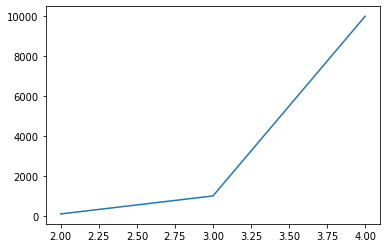

In [25]:
from matplotlib import pyplot as plt
plt_x = np.linspace(2, 4, 3) # 1부터 10까지 동일한 간격의  20개의 값 설정 
print('plt_x:', plt_x)
plt_y = np.logspace(2, 4, 3) # 2 부터 4까지 동일한 log scale 간격의 20개의 벡터값 설정
print('plt_y:', plt_y) # np.log10(100) = 2, np.log10(1000) = 3
plt.plot(plt_x, plt_y)
plt.show()

## 12.5 병렬화로 모델 선택 속도 높이기

과제 : 모델 선택의 처

In [ ]:
# p.328